In [3]:
!pip install gdown

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [8]:
import gdown
import tarfile
import os
url = 'https://drive.usercontent.google.com/download?id=107FTosYIeBn5QbynR46YG91nHcJ70whs&export=download&authuser=0&confirm=t&uuid=60b63e1a-f494-4f24-bdb1-b55131562a39&at=APZUnTVF0wI3FBlvrHXL3r-PlZjg:1704103333738'
output = '../data/train.tar'
if not os.path.exists(output):
  print('Downloading dataset')
  gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.usercontent.google.com/download?id=107FTosYIeBn5QbynR46YG91nHcJ70whs&export=download&authuser=0&confirm=t&uuid=60b63e1a-f494-4f24-bdb1-b55131562a39&at=APZUnTVF0wI3FBlvrHXL3r-PlZjg:1704103333738
To: e:\Masters\Period2\DeepLearning\Assignments\few-shot-MiniImageNet-EuroSAT\data\train.tar
100%|██████████| 126M/126M [00:11<00:00, 11.2MB/s] 


In [1]:
import sys
sys.path.append('..')
import torch
import torch.backends.cudnn as cudnn
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import random

from src.data_loader import imshow, GetDataLoadersEuroSat, SmallGetDataLoaders, GetDataLoaders
from torchvision.utils import draw_bounding_boxes
from torchvision.io import read_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights
import torchvision.transforms.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cudnn.benchmark = True
plt.ion()   # interactive mode

In [2]:
print(torchvision.__version__)
print(torch.__version__)

0.16.1+cpu
2.1.1+cpu


In [2]:
plt.rcParams["savefig.bbox"] = 'tight'

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [3]:
BATCH_SIZE=8
SHUFFLE=True
WORKERS=4

In [4]:
data_dir = '..\\data\\miniImageNet\\train'
dataset  = SmallGetDataLoaders(data_dir, BATCH_SIZE, SHUFFLE, num_workers=WORKERS)

In [5]:
print(dataset)

Dataset ImageFolder
    Number of datapoints: 38400
    Root location: ..\data\miniImageNet\train
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=warn)
               ColorJitter(brightness=(0.6, 1.4), contrast=(0.6, 1.4), saturation=(0.6, 1.4), hue=None)
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               GaussianBlur(kernel_size=(3, 3), sigma=(0.5, 2.0))
               RandomRotation(degrees=[0.0, 30.0], interpolation=nearest, expand=False, fill=0)
               RandomAdjustSharpness(sharpness_factor=0.25,p=0.5)
               RandomAutocontrast(p=0.25)
               RandomEqualize(p=0.5)
               ToTensor()
           )


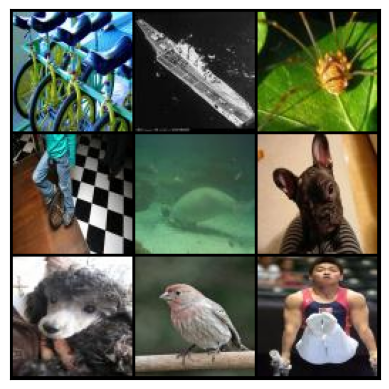

In [44]:
x = 9  # Set the number of items you want to pick
random_samples = random.sample(dataset.samples, x)
img_list = []
img = None
for i in range(len(random_samples)):
    img_path = random_samples[i][0]
    img = read_image(img_path)
    img_list.append(img)
grid = torchvision.utils.make_grid(img_list, nrow=3, scale_each=True)
show(grid)

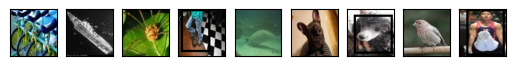

In [49]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
transforms = weights.transforms()
model = fasterrcnn_resnet50_fpn(weights=weights, progress=False)
model = model.eval()

images = [transforms(d) for d in img_list]
outputs = model(images)

score_threshold = .8
img_with_boxes = [
    draw_bounding_boxes(idex, boxes=output['boxes'][output['scores'] > score_threshold], width=4)
    for idex, output in zip(img_list, outputs)
]
show(img_with_boxes)

In [8]:
data_dir = '..\\data\\miniImageNet\\train'
dataloaders, class_names, dataset_sizes  = GetDataLoaders(data_dir, BATCH_SIZE, SHUFFLE, num_workers=WORKERS)

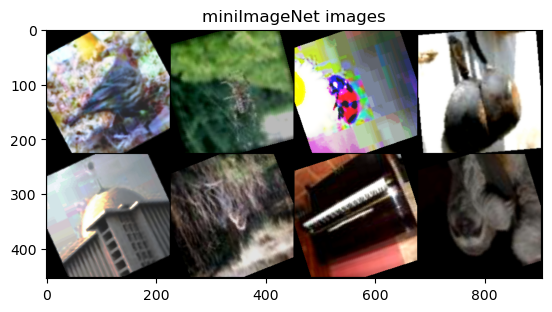

In [11]:
# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs, nrow=4)
imshow(out, title='miniImageNet images')

In [ ]:
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
transforms = weights.transforms()

images = [transforms(d) for d in inputs]

model = fasterrcnn_resnet50_fpn(weights=weights, progress=False)
model = model.eval()
outputs = model(images)

score_threshold = .8
show_images_with_bounding_boxes = [
    draw_bounding_boxes(index, boxes=output['boxes'][output['scores'] > score_threshold], width=4)
    for index, output in zip(inputs, outputs)
]
show(show_images_with_bounding_boxes)

In [ ]:
data_dir = '..\\data\\EuroSAT_RGB'
euroSatdataloaders, euroSatclass_names, euroSatdataset_sizes  = GetDataLoadersEuroSat(data_dir, BATCH_SIZE, SHUFFLE, num_workers=WORKERS)

In [ ]:
euroSatInputs, euroSatclasses = next(iter(euroSatdataloaders['train']))
out = torchvision.utils.make_grid(euroSatInputs, nrow=4, scale_each=True)
imshow(out, title='EuroSAT images')

In [ ]:
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
transforms = weights.transforms()

images = [transforms(d) for d in euroSatInputs]

model = fasterrcnn_resnet50_fpn(weights=weights, progress=False)
model = model.eval()

outputs = model(images)

In [ ]:
score_threshold = .8
sat_images_with_boxes = [
    draw_bounding_boxes(dog_int, boxes=output['boxes'][output['scores'] > score_threshold], width=4)
    for dog_int, output in zip(euroSatInputs, outputs)
]
show(sat_images_with_boxes)